# Hyperparameter Tuning Methods Comparison
Cross validation approach based on the following [repo](https://github.com/roamanalytics/roamresearch/tree/master/BlogPosts/Hyperparameter_tuning_comparison)

In [1]:
%matplotlib inline

In [2]:
import dataset_loader as datasets
import model_loader as models
import seaborn as sns
from hpt_cmp import *

In [3]:
%load_ext autoreload
%aimport hpt_cmp
%aimport dataset_loader
%autoreload 2

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from __future__ import print_function
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [6]:
# Loading the Digits dataset
mth = 'load_'+'digits'
digits = datasets.load_digits()
iris = datasets.load_iris()
wine = datasets.load_wine()
bc = datasets.load_breast_cancer()
cs = datasets.load_census_50k()

all_datasets = [cs]
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

In [18]:
seed = np.array([1], dtype=np.integer)
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'kernel': ['rbf', 'linear'],
    'random_state':seed
}

bayes_grid ={
    'C': (0.1, 100, 'log-uniform'),
    'gamma': (0.0001, 1, 'log-uniform'),
    'kernel': ['rbf', 'linear'],
    'random_state':seed
}

hyperopt_grid = {
    'C': hp.loguniform('C', np.log(0.1),np.log(100)),
    'gamma': hp.choice('gamma',[0.0001, 0.001, 0.01, 0.1, 1.0]),
    'kernel': hp.choice('kernel', ['rbf', 'linear']),
    'random_state':seed[0]
}

In [19]:
hpt_objs = [
    # add more objs once more search functions implemented
        ('Baseline', {'C': 1, 'gamma': 0.0001, 'kernel': 'linear', 'random_state': seed[0]}, run_baseline, {}),
        ('RandomSearch', param_grid, random_search,{'n_iter':MAX_ITER, 'n_jobs':-2}),
        ('Tree of Parzen Estimator',hyperopt_grid,tpe_search,{}),
        #('GridSearch', param_grid, grid_search, {}),
        #('BaysianSearch', bayes_grid,baysian_search,{'n_iter':MAX_ITER}),
]

#### cmp_hpt_methods
Parameter description
> `htp_objs`: list of hyperparam-tuning object <br>
> `model`: sklearn model to optimize (needs to have fit/predict function)<br>
> `dataset`: tuple of (X,y) e.g (Data, Target) <br>
> `loss`: sklearn loss function to user <br>
> `metric`: sklearn metric to optimize for <br>
> `datset_split`: random_state for datasetsplit <br>
> `name`: currently not user *optional* <br>

In [20]:
all_results = []

for ds in all_datasets:
# Run search & print result
    results = cmp_hpt_methods(
        (ds.data, ds.target),
        hpt_objs,
        SVC,
        'accuracy', #http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        accuracy_score, name='-2-SVC-census')
    all_results.append(results)

5 2


KeyboardInterrupt: 

In [ ]:
sum_res = []
for r in all_results[0]:
    sum_res.append((r[HPT_METHOD], r[CV_TIME],len(r[INNER_RES]['params']), r[TEST_ACC], r[BEST_PARAMS], np.array(r[INNER_RES]['mean_test_score']).mean() ))

df = pd.DataFrame(sum_res, columns=[HPT_METHOD, 'TIME', PARAMS_SAMPLED, TEST_ACC, BEST_PARAMS, 'SCORE'])

In [ ]:
df

In [15]:
pd.DataFrame(df[BEST_PARAMS].tolist())

,C,gamma,kernel,random_state
0,1.00000,0.0001,linear,1
1,100.00000,0.0010,rbf,1
2,10.02213,0.0100,rbf,1


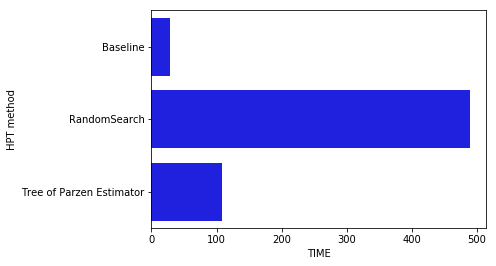

<Figure size 432x288 with 0 Axes>

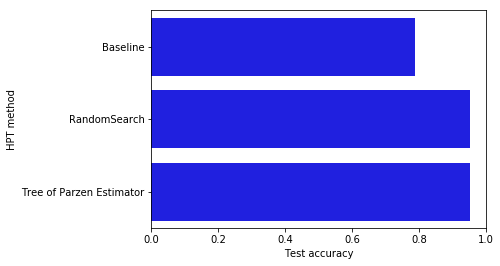

In [16]:
# plot comparison
plt.figure()
sns.barplot(x='TIME', y=HPT_METHOD,data =df, color='b')
plt.figure()
# plot accuracy comparison
fig, ax =plt.subplots()
#ax.set(xlim=(0.7, 1.0))
sns.barplot(x=TEST_ACC, y=HPT_METHOD, ax = ax,data =df, color='b')

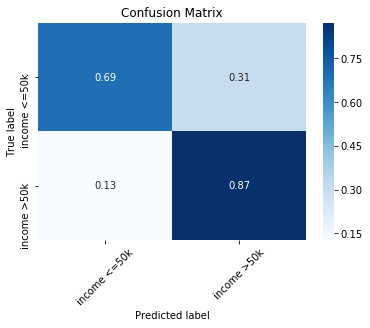

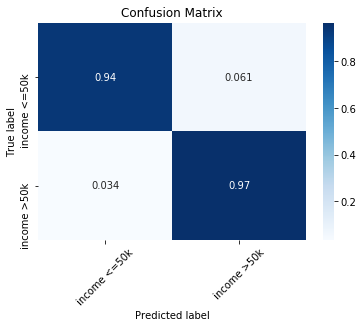

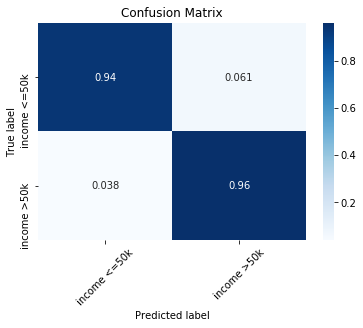

In [17]:
for r in all_results[0]:
    plot_confusion_matrix(r[CONF_MATRIX], cs.target_names)